In [1]:
import pennylane as qml
import pennylane.numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
def get_total_mag(results, shots):
    sig_x = np.tensor(results['observables'])[:,:3]
    sig_z = np.tensor(results['observables'])[:,3:]
    std_sig_x = np.sqrt(np.tensor(results['variances'])[:,:3]/shots)
    std_sig_z = np.sqrt(np.tensor(results['variances'])[:,3:]/shots)

    sum_sig_x = np.sum(sig_x, axis=1)
    sum_sig_z = np.sum(sig_z, axis=1)
    sum_sig_x_std = np.sqrt(np.sum(std_sig_x**2, axis=1))
    sum_sig_z_std = np.sqrt(np.sum(std_sig_z**2, axis=1))
    
    return sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std

In [5]:
data_state_simulator = qml.data.Dataset()
data_state_simulator.read('observable_results_v2.dat')

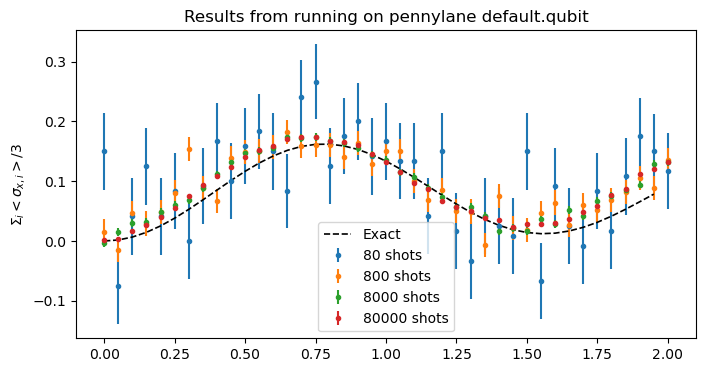

In [6]:
fig, ax = plt.subplots(figsize=(8,4))


# add 
for s, results in data_state_simulator.observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_x/3, sum_sig_x_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{x,i}>/3$')
    
exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sx'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(f'Results from running on pennylane default.qubit')
ax.legend()

In [7]:
plt.savefig('sigma_x_default.qubit.png')

<Figure size 640x480 with 0 Axes>

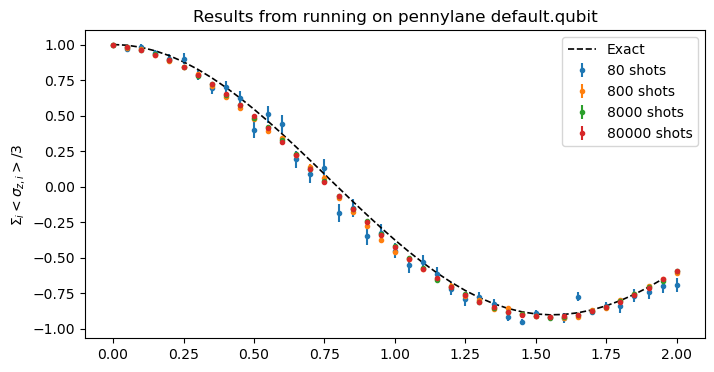

In [8]:
fig, ax = plt.subplots(figsize=(8,4))

for s, results in data_state_simulator.observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_z/3, sum_sig_z_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{z,i}>/3$')

exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sz'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(f'Results from running on pennylane default.qubit')
ax.legend()

In [9]:
plt.savefig('sigma_z_default.qubit.png')

<Figure size 640x480 with 0 Axes>

In [10]:
data_qasm_sim_8000 = qml.data.Dataset()
data_qasm_sim_8000.read('qiskit.ibmq_ibmq_qasm_simulator_shots8000_observable_results_v2.dat')

In [11]:
data_qasm_sim_800 = qml.data.Dataset()
data_qasm_sim_800.read('qiskit.ibmq_ibmq_qasm_simulator_shots800_observable_results_v2.dat')

In [12]:
data_qasm_sim_80 = qml.data.Dataset()
data_qasm_sim_80.read('qiskit.ibmq_ibmq_qasm_simulator_shots80_observable_results_v2.dat')

In [13]:
data_qasm_sim_20000 = qml.data.Dataset()
data_qasm_sim_20000.read('qiskit.ibmq_ibmq_qasm_simulator_shots20000_observable_results_v2.dat')

In [14]:
observable_results = data_qasm_sim_80.on_device_observable_results

In [15]:
observable_results.update(data_qasm_sim_800.on_device_observable_results)

In [16]:
observable_results.update(data_qasm_sim_8000.on_device_observable_results)

In [17]:
observable_results.update(data_qasm_sim_20000.on_device_observable_results)

In [18]:
observable_results.keys()

dict_keys([80, 800, 8000, 20000])

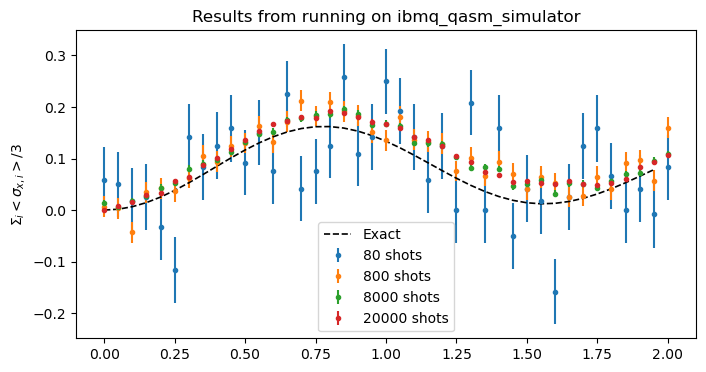

In [19]:
fig, ax = plt.subplots(figsize=(8,4))


# add 
for s, results in observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_x/3, sum_sig_x_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{x,i}>/3$')
    
exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sx'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(f'Results from running on ibmq_qasm_simulator')
ax.legend()

In [20]:
plt.savefig('sigma_x_ibmq_qasm_simulator.png')

<Figure size 640x480 with 0 Axes>

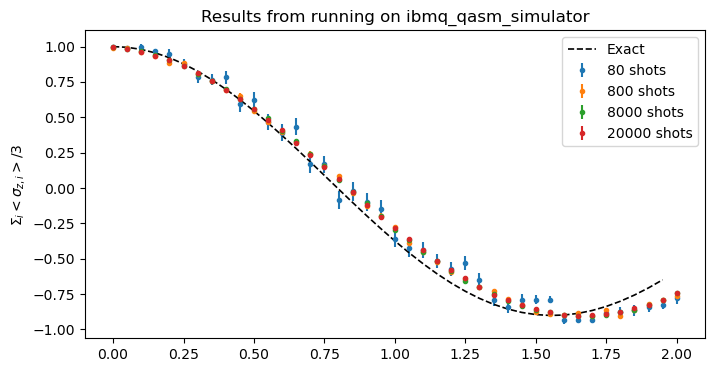

In [21]:
fig, ax = plt.subplots(figsize=(8,4))

for s, results in observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_z/3, sum_sig_z_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{z,i}>/3$')

exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sz'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(f'Results from running on ibmq_qasm_simulator')
ax.legend()

In [22]:
plt.savefig('sigma_z_ibmq_qasm_simulator.png')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of Optimization Steps')

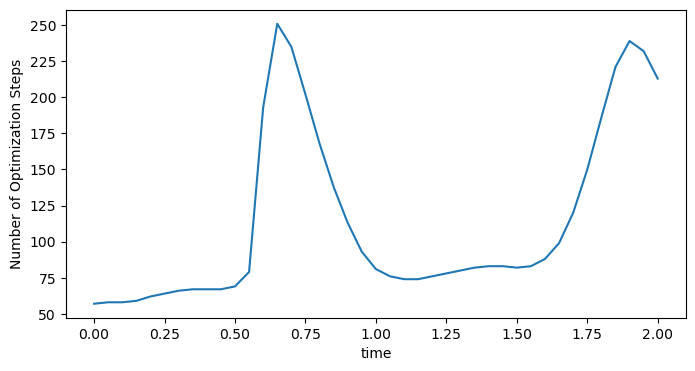

In [23]:
fig, ax = plt.subplots(figsize=(8,4))

for shots, results in data_state_simulator.observable_results.items():
    if shots == 80:
        n = results['number_of_iterations_to_converge']
        t = results['time']
        ax.plot(t,n)
#ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('Number of Optimization Steps')

In [24]:
plt.savefig('optimization_steps_v_time_default.qubit.png')

<Figure size 640x480 with 0 Axes>

In [25]:
np.mean(data_state_simulator.observable_results[80]['final_costs_v_time'][:40])/0.05**2

0.007887460075669537

In [26]:
np.mean(data_state_simulator.observable_results[80]['final_costs_v_time'][:40])

1.9718650189173846e-05

In [27]:
v = data_state_simulator.observable_results[80]['time'][1]

In [28]:
print(v)

0.05


Text(0.5, 1.0, 'Time 0.05 s')

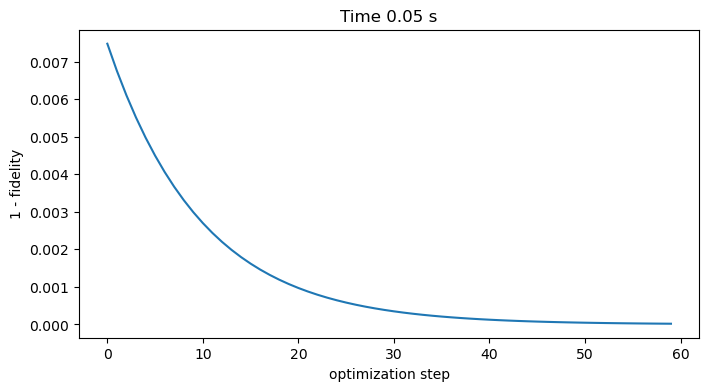

In [29]:
fig, ax = plt.subplots(figsize=(8,4))
idx = 1
n = np.array(data_state_simulator.observable_results[80]['full_costs_v_time'][idx])
ax.plot(n)
ax.set_xlabel('optimization step')
ax.set_ylabel('1 - fidelity')
v = data_state_simulator.observable_results[80]['time'][idx]
ax.set_title(f'Time {v} s')



In [30]:
plt.savefig('cost_function_v_step_t0.05.png')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Time 1.0 s')

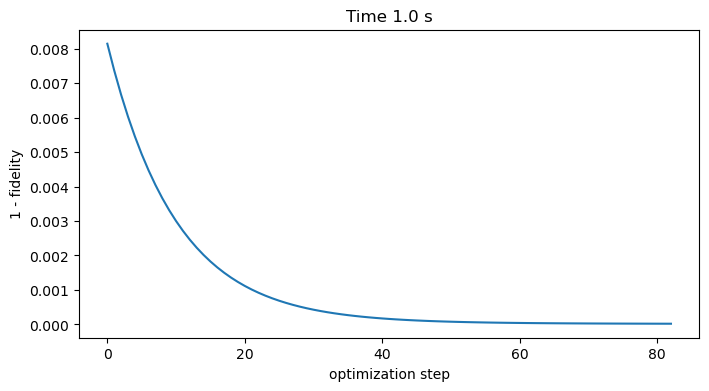

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
idx = 20
n = np.array(data_state_simulator.observable_results[80]['full_costs_v_time'][idx])
ax.plot(n)
ax.set_xlabel('optimization step')
ax.set_ylabel('1 - fidelity')
v = data_state_simulator.observable_results[80]['time'][idx]
ax.set_title(f'Time {v} s')



In [32]:
plt.savefig('cost_function_v_step_t1.0.png')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Time 2.0 s')

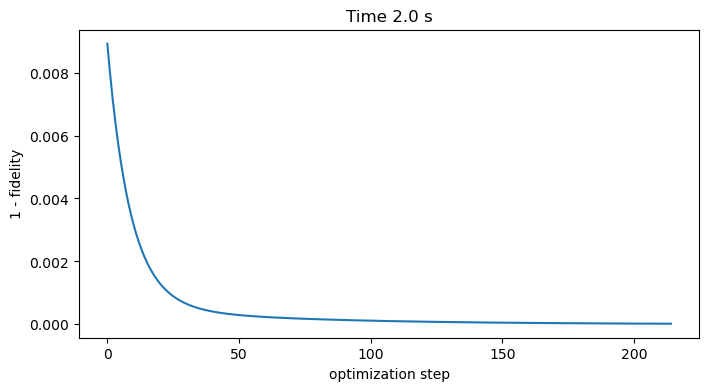

In [33]:
fig, ax = plt.subplots(figsize=(8,4))
idx = 40
n = np.array(data_state_simulator.observable_results[80]['full_costs_v_time'][idx])
ax.plot(n)
ax.set_xlabel('optimization step')
ax.set_ylabel('1 - fidelity')
v = data_state_simulator.observable_results[80]['time'][idx]
ax.set_title(f'Time {v} s')



In [34]:
plt.savefig('cost_function_v_step_t2.0.png')

<Figure size 640x480 with 0 Axes>

In [35]:
data_nairobi_sim_800 = qml.data.Dataset()
data_nairobi_sim_800.read('qiskit.ibmq_ibm_nairobi_shots800_observable_results.dat')

In [36]:
observable_results = data_nairobi_sim_800.on_device_observable_results

In [37]:
data_nairobi_sim_8000 = qml.data.Dataset()
data_nairobi_sim_8000.read('qiskit.ibmq_ibm_nairobi_shots8000_observable_results.dat')

In [38]:
observable_results.update(data_nairobi_sim_8000.on_device_observable_results)

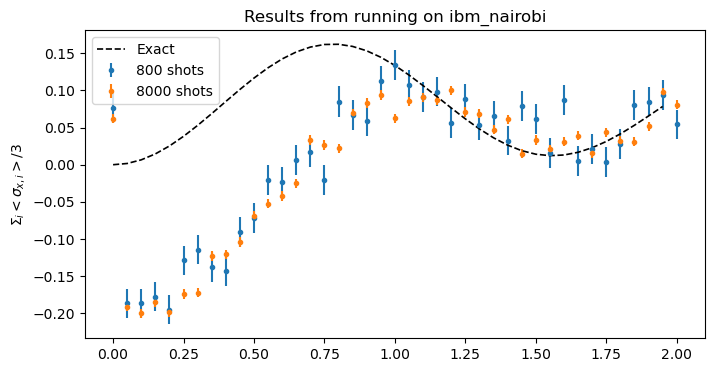

In [39]:
fig, ax = plt.subplots(figsize=(8,4))


# add 
for s, results in observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_x/3, sum_sig_x_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{x,i}>/3$')
    
exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sx'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(f'Results from running on ibm_nairobi')
ax.legend()

In [40]:
plt.savefig('sigma_x_ibm_nairobi.png')

<Figure size 640x480 with 0 Axes>

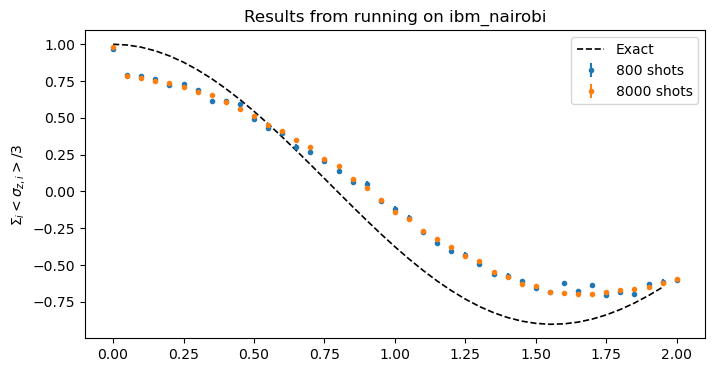

In [41]:
fig, ax = plt.subplots(figsize=(8,4))

for s, results in observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_z/3, sum_sig_z_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{z,i}>/3$')

exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sz'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(f'Results from running on ibm_nairobi')
ax.legend()

In [42]:
plt.savefig('sigma_z_ibm_nairobi.png')

<Figure size 640x480 with 0 Axes>

In [47]:
d = qml.data.Dataset()
d.read('braket.aws.qubit_simulator_shots80_observable_results_v2.dat')
observable_results = d.on_device_observable_results

d = qml.data.Dataset()
d.read('braket.aws.qubit_simulator_shots800_observable_results_v2.dat')
observable_results.update(d.on_device_observable_results)

d = qml.data.Dataset()
d.read('braket.aws.qubit_simulator_shots8000_observable_results_v2.dat')
observable_results.update(d.on_device_observable_results)

In [48]:
title = f'Results from running on AWS Braket Simulator'

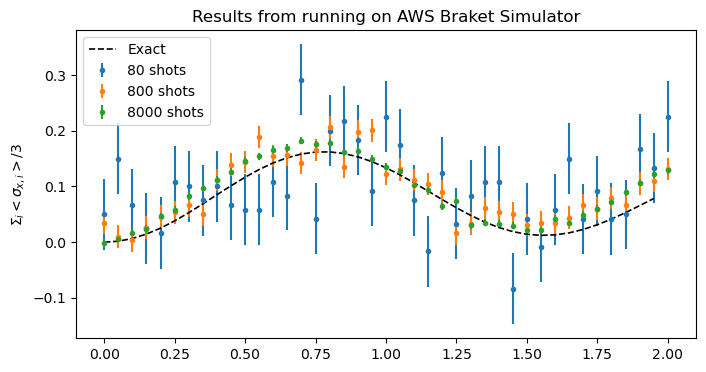

In [51]:
fig, ax = plt.subplots(figsize=(8,4))

# add 
for s, results in observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_x/3, sum_sig_x_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{x,i}>/3$')
    
exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sx'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(title)
ax.legend()

In [52]:
plt.savefig('sigma_x_aws_braket_sim.png')

<Figure size 640x480 with 0 Axes>

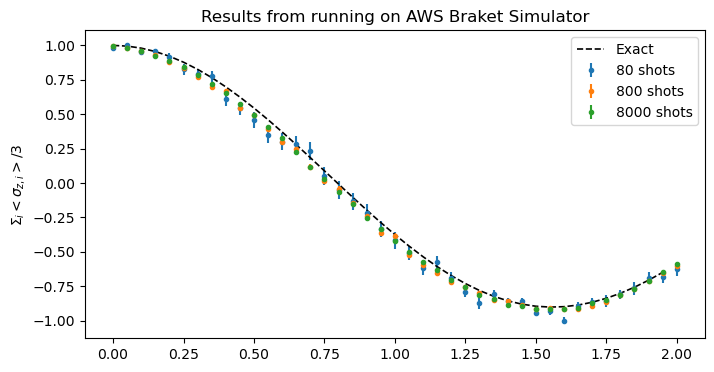

In [53]:
fig, ax = plt.subplots(figsize=(8,4))

for s, results in observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_z/3, sum_sig_z_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{z,i}>/3$')

exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sz'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(title)
ax.legend()

In [54]:
plt.savefig('sigma_z_aws_braket_sim.png')

<Figure size 640x480 with 0 Axes>

In [55]:
d = qml.data.Dataset()
d.read('braket.aws.qubit_ionq_shots80_observable_results_v2.dat')
observable_results = d.on_device_observable_results

d = qml.data.Dataset()
d.read('braket.aws.qubit_ionq_shots2000_observable_results_v2.dat')
observable_results.update(d.on_device_observable_results)


In [56]:
title = f'Results from running on AWS Braket: IonQ'

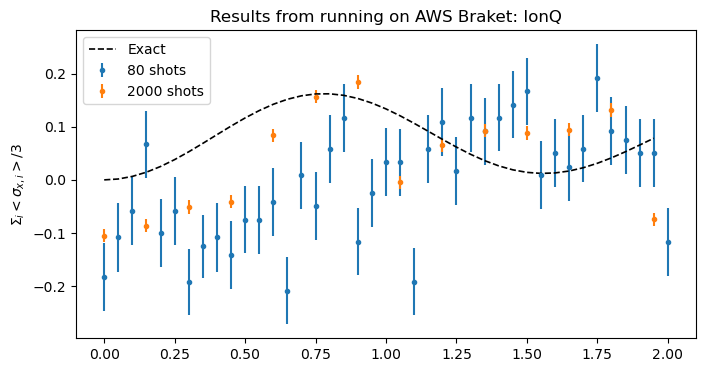

In [58]:
fig, ax = plt.subplots(figsize=(8,4))

# add 
for s, results in observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_x/3, sum_sig_x_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{x,i}>/3$')
    
exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sx'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(title)
ax.legend()

In [59]:
plt.savefig('sigma_x_aws_braket_ionq.png')

<Figure size 640x480 with 0 Axes>

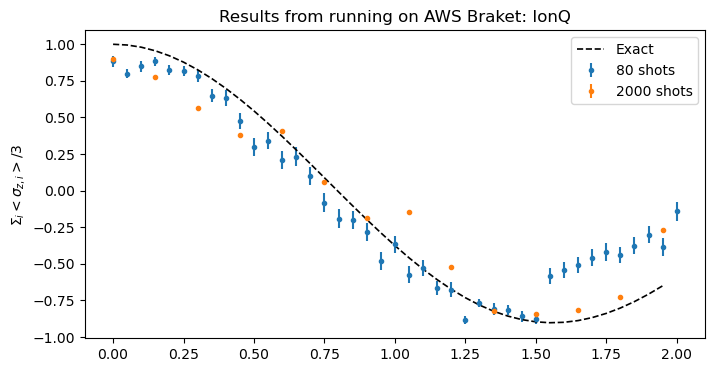

In [57]:
fig, ax = plt.subplots(figsize=(8,4))

for s, results in observable_results.items():
    sum_sig_x, sum_sig_z, sum_sig_x_std, sum_sig_z_std = get_total_mag(results, s)
    ax.errorbar(results['time'],sum_sig_z/3, sum_sig_z_std/3, fmt = '.', label=f'{s} shots')
    ax.set_ylabel('$\Sigma_i <\sigma_{z,i}>/3$')

exact = json.load(open('exact_solutions.dat'))
ax.plot(exact['times'][:40],exact['Sz'][:40],label ="Exact",linestyle='dashed',linewidth=1.2,color='black')
ax.set_title(title)
ax.legend()

In [60]:
plt.savefig('sigma_z_aws_braket_ionq.png')

<Figure size 640x480 with 0 Axes>